# Instructor Do: ROC Curves

In [1]:
# Initial imports
import numpy as np
import pandas as pd
from path import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Myopia Diagnostic Dataset

**Dataset Characteristics:**

* _Number of Instances:_ 618

* _Number of Attributes:_ 16 numeric, predictive attributes and the class.

* _Attribute Information:_
        
  * ID: Study ID
  * AGE: Age at first visit (years)
  * SPHEQ: Spherical Equivalent Refraction (diopter)
  * AL: Axial Length (mm)
  * ACD: Anterior Chamber Depth (mm)
  * LT: Lens Thickness (mm)
  * VCD: Vitreous Chamber Depth (mm)
  * SPORTHR: Time spent engaging in sports/outdoor activities (hours per week)
  * READHR:Time spent reading for pleasure (hours per week)
  * COMPHR:Time spent playing video/computer games or working on the computer (hours per week)
  * STUDYHR:Time spent reading or studying for school assignments (hours per week)
  * TVHR: Time spent watching television (hours per week)
  * DIOPTERHR: Composite of near-work activities (hours per week)
  * MOMMY: Was the subject’s mother myopic? (No/Yes)
  * DADMY: Was the subject’s father myopic? (No/Yes)
  * MYOPIC: Myopia within the first five years of follow up (No/Yes)

**Data source:** The dataset used in this activity is a subset of data from Orinda Longitudinal Study of Myopia conducted by the US National Eye Institute. <https://clinicaltrials.gov/ct2/show/NCT00000169>

In [2]:
# Load dataset
file_path = Path("../Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Check the number of occurrences per target value. The classes are unbalanced.
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [4]:
# Create X (features) and y (target) sets
X = df.drop("MYOPIC", axis=1)
y = df["MYOPIC"].values

In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [6]:
# Check the number of occurrences per target value in the training data
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the `y_train` array:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique values of the `y_train` array:
[[  0   1]
 [268  41]]


In [7]:
# Check the number of occurrences per target value in the testing data
unique_elements_test, counts_elements_test = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the `y_test` array:")
print(np.asarray((unique_elements_test, counts_elements_test)))

Frequency of unique values of the `y_test` array:
[[  0   1]
 [269  40]]


In [8]:
# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [9]:
# Transform the training and testing data by using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Using KNN to Create the ROC Curve

In [10]:
# Import the KNN classifier model from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.806
k: 3, Train/Test Score: 0.887/0.841
k: 5, Train/Test Score: 0.893/0.871
k: 7, Train/Test Score: 0.887/0.871
k: 9, Train/Test Score: 0.877/0.867
k: 11, Train/Test Score: 0.871/0.877
k: 13, Train/Test Score: 0.871/0.871
k: 15, Train/Test Score: 0.867/0.874
k: 17, Train/Test Score: 0.867/0.871
k: 19, Train/Test Score: 0.867/0.871


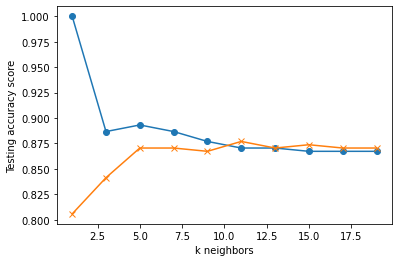

In [11]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [12]:
# Create the KNN model. Note that k: 11 provides the best accuracy 
knn_model = KNeighborsClassifier(n_neighbors=11)

In [13]:
# Train the KNN model
knn_model.fit(X_train_scaled, y_train)
print("k=11 Test Acc: %.3f" % knn_model.score(X_test_scaled, y_test))

k=11 Test Acc: 0.877


In [14]:
# Show the confussion matrix for the KNN model
from sklearn.metrics import confusion_matrix

y_pred_knn = knn_model.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[269   0]
 [ 38   2]]


In [15]:
# Print classification report for the KNN model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       269
           1       1.00      0.05      0.10        40

    accuracy                           0.88       309
   macro avg       0.94      0.53      0.51       309
weighted avg       0.89      0.88      0.83       309



Instead of a pure binary output, the KNN model also has a `predict_proba()` method, which returns probability estimates for given input. For example, here are the first 10 predictions of the testing set.

In [16]:
knn_model.predict(X_test_scaled[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

And, here are the first 10 probability estimates of the testing set. 

In [17]:
# Note that each pair always adds up to exactly 1
knn_model.predict_proba(X_test_scaled[0:10])

array([[0.90909091, 0.09090909],
       [0.81818182, 0.18181818],
       [0.81818182, 0.18181818],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.72727273, 0.27272727]])

We're concerned only with the second column. The `predict()` method is setting a cutoff of 0.5. If the predicted probability is  0.5 or greater, it returns 1. Otherwise, it returns 0.

In [18]:
knn_model.predict_proba(X_test_scaled[0:10])[:,1]

array([0.09090909, 0.18181818, 0.18181818, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27272727])

What if we want to use a different cutoff value? If we increase the cutoff, we increase the rate of false negatives. If we decrease the cutoff, we increase the rate of false positives.

The receiver operating characteristic (ROC) curve helps us visualize this tradeoff. The false positive rate and the true positive rate are calculated for several thresholds, and we plot them against each other.

In [19]:
# Import the roc_curve module from scikit-learn
from sklearn.metrics import roc_curve

In [20]:
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

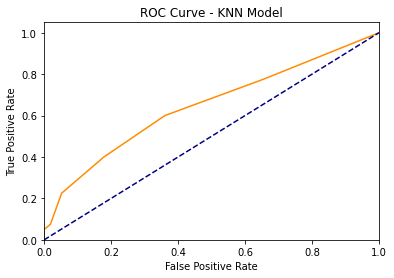

In [21]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.show()

We can also measure the area under the curve (AUC) for another measure of the robustness of the model. An AUC of 0.5 means that the model is no more predictive than random chance. An AUC of 1.0 is as good as a model can theoretically get. (This means that for any chosen cutoff point between 0 and 1, the model is perfectly accurate).

In [22]:
# Import the auc module from scikit-learn
from sklearn.metrics import auc

In [23]:
# Compute the AUC for the KNN model
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the KNN Model: {roc_auc_knn}")

AUC for the KNN Model: 0.645492565055762


## Using Logistic Regression to Create the ROC Curve

In [24]:
# Create a logistic regresion model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)

In [25]:
# Train the logistic regression model
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [26]:
# Print the training and testing scores
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.9061488673139159
Testing Data Score: 0.889967637540453


In [27]:
# Get the probability for each class in the model
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:,1]

In [28]:
# Get the ROC curve data for the logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

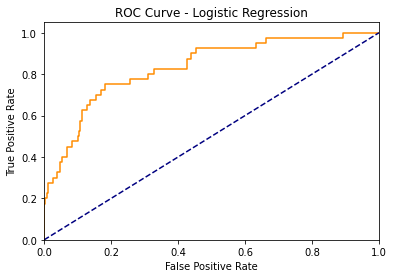

In [29]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [30]:
# Compute AUC for the logistic regression model
roc_auc_lr = auc(fpr_lr, tpr_lr)
print(f"AUC for the Logistic Regression Model: {roc_auc_lr}")

AUC for the Logistic Regression Model: 0.8324349442379182


In [31]:
# Show the confusion matrix for the logistic regression model
y_pred_lr = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[ 15 254]
 [  0  40]]


In [32]:
# Print the classification report for the logistic regression model
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11       269
           1       0.14      1.00      0.24        40

    accuracy                           0.18       309
   macro avg       0.57      0.53      0.17       309
weighted avg       0.89      0.18      0.12       309

